In [56]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('train _titanic.csv',usecols=['Age','Fare','Survived'])

In [58]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [59]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [60]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [62]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [63]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [64]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [65]:
X_train['Age_imputed']

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age_imputed, Length: 712, dtype: float64

In [66]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [67]:
X_train['Age'].dropna()

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
360    40.0
75     25.0
299    50.0
534    30.0
493    71.0
Name: Age, Length: 564, dtype: float64

In [68]:
X_train['Age'].dropna().sample(1).values

array([25.])

In [69]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 29.  , 48.  , 47.  , 27.  , 25.  , 16.  , 16.  , 42.  ,
       34.  , 36.  , 35.  , 21.  , 30.  , 24.  , 39.  , 27.  , 45.  ,
       14.5 ,  7.  , 40.  , 36.  , 25.  , 31.  , 63.  , 47.  , 52.  ,
       19.  , 44.  , 20.  , 28.  , 24.  , 30.  , 54.  , 25.  ,  3.  ,
       19.  , 11.  , 22.  , 26.  , 28.5 , 21.  , 33.  , 27.  , 35.  ,
       35.  , 56.  ,  1.  , 20.  , 34.5 , 24.  , 48.  , 30.  , 45.  ,
       24.  , 28.  , 33.  , 22.  , 24.  , 27.  , 26.  , 39.  , 14.  ,
       30.  , 31.  , 28.  , 64.  ,  8.  , 40.  , 17.  , 41.  , 35.  ,
       39.  , 18.  , 16.  , 25.  ,  0.75, 23.  , 36.  , 40.  , 23.  ,
       21.  , 50.  , 20.  ,  9.  , 41.  , 23.  , 25.  , 70.5 , 30.  ,
       31.  , 52.  , 22.  ,  3.  , 45.  , 39.  , 17.  , 16.  , 35.  ,
       24.  , 17.  , 12.  , 45.  , 16.  , 60.  , 21.  , 54.  , 29.  ,
       27.  , 18.  ,  4.  , 27.  ,  9.  , 42.  ,  2.  , 20.  , 29.  ,
       37.  , 26.  , 23.  , 22.  , 32.  , 25.  , 26.  , 59.  , 40.  ,
       15.  , 16.  ,

In [70]:
(X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values).shape # 148 missing values

(148,)

## Random Value Filling

In [71]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values



In [72]:
X_train # Age has NaN , bit Age imputed is filled by random values of columns

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,32.0
493,71.0,49.5042,71.0
527,NaN,221.7792,52.0


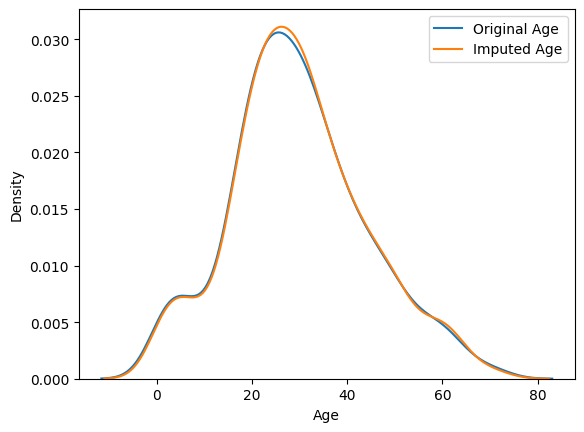

In [73]:
# sns.distplot(X_train['Age'],label='Original')
# sns.distplot(X_train['Age_imputed'],label='Imputed')

sns.kdeplot(data = X_train, x = "Age",label="Original Age")


sns.kdeplot(data = X_train, x = "Age_imputed", label="Imputed Age")

plt.legend()
plt.show()


In [74]:
print('Original Age Variable Varience',X_train['Age'].var())
print('Random Age  Imputation Variable Varience',X_train['Age_imputed'].var())

Original Age Variable Varience 204.34951339046142
Random Age  Imputation Variable Varience 201.67082920005055


In [75]:
X_train[['Fare','Age','Age_imputed']].cov() # covarience changed

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,60.018867
Age,71.512440,204.349513,204.349513
Age_imputed,60.018867,204.349513,201.670829


<Axes: >

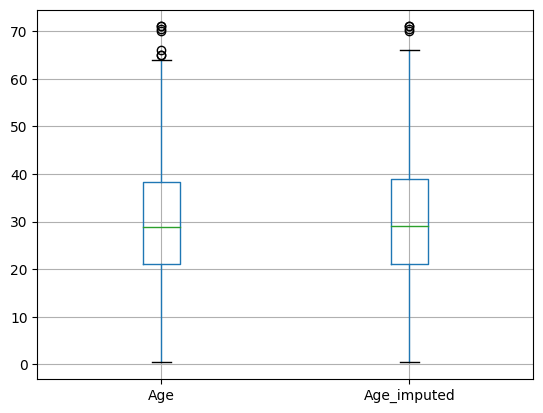

In [76]:
X_train[['Age','Age_imputed']].boxplot() # no change in outlier.

## Note:
      1. There is high changes that if we give same data of fare sy 5000 we are generating age now as random so we will get diffrerent outcome as age genrated will be random.
      2. Such kind of things will hamper the code. 
      3. Make sure at code level for same input sample return same outcome.

      4. sampled_value = X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))
      5. Random_Stae will take care till the observation is same it give same outcome.
 


## Categorical Variable

In [77]:
df = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [78]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
123,NaN,TA,153900
887,NaN,TA,135500
1339,NaN,TA,128500
793,NaN,TA,225000
330,NaN,TA,119000


In [79]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [80]:
X = df
Y = df['SalePrice']

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [85]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [86]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1322,TA,TA,190000,TA,TA
1038,TA,NaN,97000,NaN,TA
857,TA,TA,174000,TA,TA
1062,NaN,TA,90000,TA,NaN
193,NaN,TA,130000,TA,NaN


In [87]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


/tmp/ipykernel_62264/115247114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tmp/ipykernel_62264/115247114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
/tmp/ipykernel_62264/115247114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [88]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],
    axis=1
)

temp.columns = ['orignal','imputed']

In [89]:
temp

,orignal,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [95]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
    ],
    axis=1
)

temp.columns = ['orignal','imputed']

In [96]:
temp

,orignal,imputed
Gd,0.494272,0.490582
TA,0.412439,0.414384
Fa,0.040917,0.040240
Po,0.027823,0.029110
Ex,0.024550,0.025685


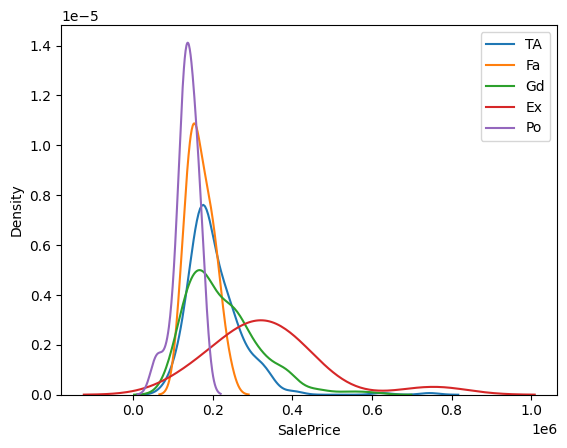

In [100]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train["FireplaceQu"] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

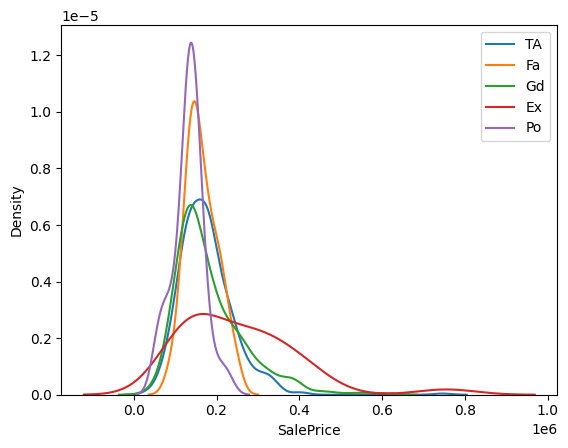

In [101]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()